# This Is A Project Based on Telecom Churn Case Study: We make predictions based on whether a customer leaves the telecom service or stays using LogisticRegression model

In [1980]:
# Importing the depencies
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression # Imports logistic Regression module
import scipy.stats as st
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split

In [1981]:
# Importing the dataset
# Churn_data
Churn_data = pd.read_csv("churn_data.csv")

In [1982]:
Churn_data.head() # Loads the first 5 rows of the datasets
# A churn of 0 implies customer stays in the telecom service
# A churn of 1 implies customer leaves the telecom service

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1983]:
#Loading Customer_data
Customer_data = pd.read_csv("customer_data.csv")

In [1984]:
Customer_data.head() # Printing first 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [1985]:
# Loading the internet dataset
Internet_data = pd.read_csv("internet_data.csv")

In [1986]:
Internet_data.head() # first 5 rows of the dataset

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [1987]:
# Merging of the data_sets: Churn_data and Customer data
df_1 = pd.merge(Churn_data, Customer_data, how ='inner', on ='customerID')

In [1988]:
# Final merging of df_1 and the internet dataframe
telecom = pd.merge(df_1, Internet_data, how ='inner', on ='customerID')

In [1989]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [1990]:
# Obtaining all columns of the dataset
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [1991]:
telecom.isnull().sum() # Checks for empty features of the dataset

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [1992]:
# Obtaining information about the dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [1993]:
#  Obtaining the shape of the object
telecom.shape
# We have 7042 featues or rows and 21 columns

(7042, 21)

In [1994]:
# Obtaining statistical information
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [1995]:
# Data-preprocessing
telecom['TotalCharges'].isnull() # Checks for all emtpy features of the column
telecom['TotalCharges'].isna() # Removes all empty features of the column
telecom['TotalCharges'].notnull() # Checks for all non-empty features of the column dataframe

0       True
1       True
2       True
3       True
4       True
        ... 
7037    True
7038    True
7039    True
7040    True
7041    True
Name: TotalCharges, Length: 7042, dtype: bool

In [1996]:
telecom['TotalCharges'].isnull().sum()

0

In [1997]:
# Replacing all  null values in the TotalCharges column feature
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [1998]:
# We impute Total charges multiplied by median of the ratio of Total charges to monthly charges
value = telecom['MonthlyCharges']*telecom['tenure']

In [1999]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges']== np.nan, other= telecom['TotalCharges']) # We replace all portions
# of the Total value where np.nan is available with the Totalcharges else it remains same

In [2000]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7042, dtype: float64

### Exploratory Data Analysis (EDA)

# Performing Univariate Analysis


(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  309.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

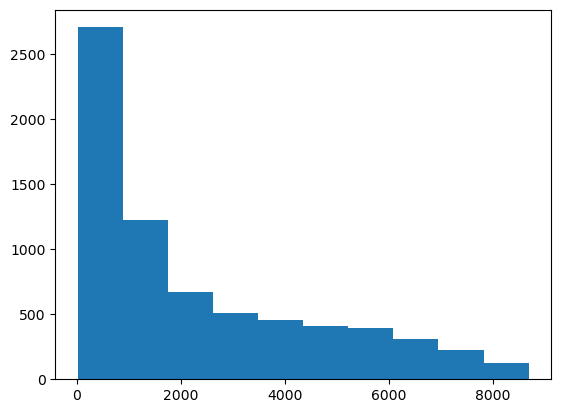

In [2002]:
# Distribution of Total Charges
plt.hist(telecom.TotalCharges) # Produces histogram of the distribution

The majority of the people fall between 0-2000 charges with fewer people having higher charges of 8000

<Axes: xlabel='Churn', ylabel='count'>

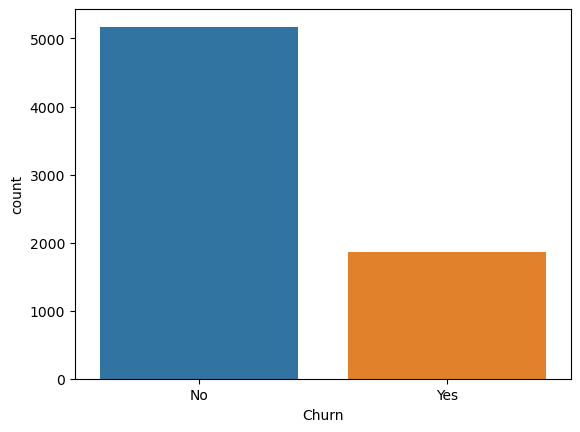

In [2003]:
# Displaying the counts of churns in the entire dataset. It checks for whether the data is unbalanced or balanced
sns.countplot(x = 'Churn', data = telecom, hue = 'Churn')

<Axes: xlabel='tenure', ylabel='Churn'>

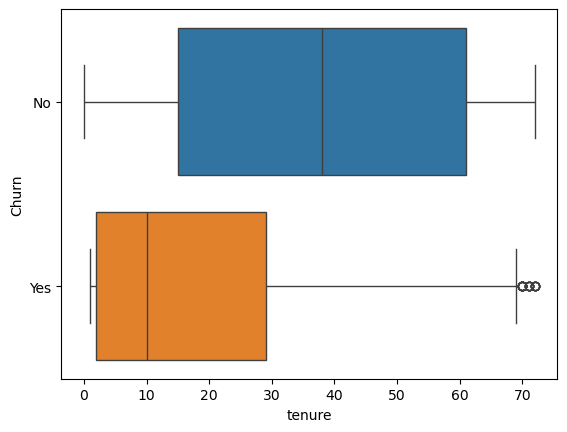

In [2004]:
# Tenure: The time frame for which the customer uses the service and have left the service
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom, hue = 'Churn')

### Finding out which contract has the churn probability to be more


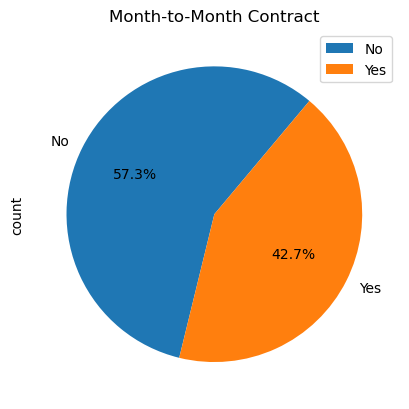

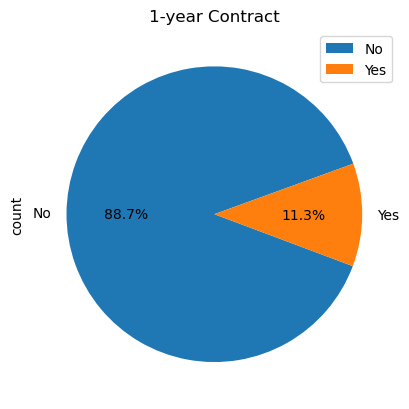

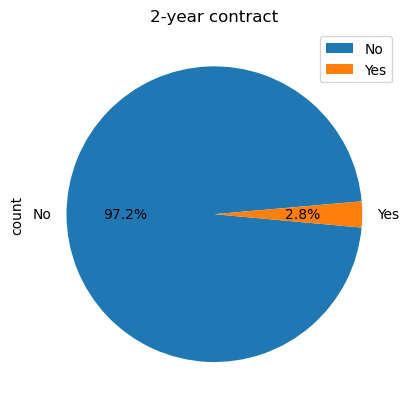

In [2005]:
pie_contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == 'Month-to-month']['Churn'].value_counts())
pie_contract_m2m.plot.pie(subplots = True, labels = pie_contract_m2m.index.values, autopct = '%1.1f%%', startangle =50)
plt.title("Month-to-Month Contract")
plt.gca().set_aspect('equal')

pie_contract_1y = pd.DataFrame(telecom[telecom['Contract'] == 'One year']['Churn'].value_counts())
pie_contract_1y.plot.pie(subplots = True, labels = pie_contract_1y.index.values, autopct = '%1.1f%%', startangle = 20)
plt.title("1-year Contract")
plt.gca().set_aspect('equal')

pie_contract_2y = pd.DataFrame(telecom[telecom['Contract'] == 'Two year']['Churn'].value_counts())
pie_contract_2y.plot.pie(subplots = True, labels = pie_contract_2y.index.values, autopct = '%1.1f%%', startangle = 5)
plt.title("2-year contract")
plt.gca().set_aspect('equal')

plt.show()

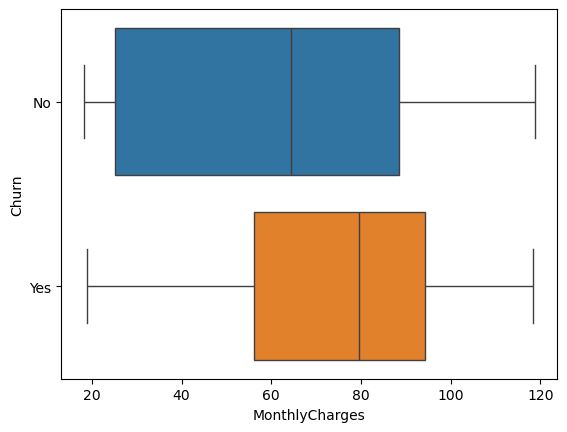

In [2006]:
# Evaluation of Month-Monthly cases on the churn
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom, hue = 'Churn')
plt.show()

In [2007]:
# Checking for whether a person has multipline lines of internet connectivity

<Figure size 1500x500 with 0 Axes>

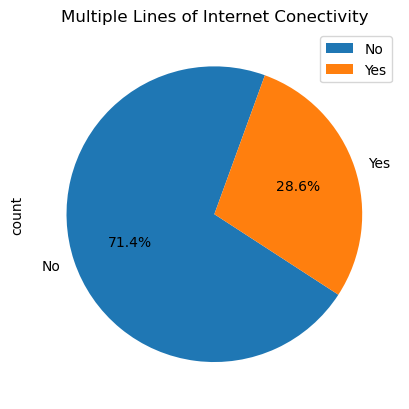

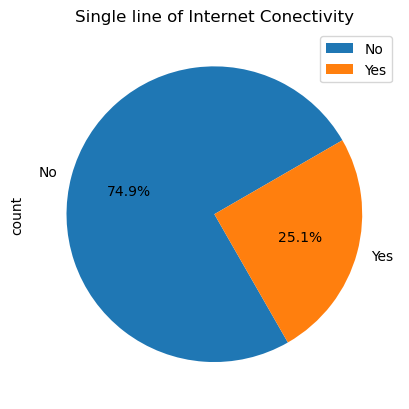

In [2008]:
plt.figure(figsize =(15,5)) # Determines the figure size of the the plot
pie_Multiplines= pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts()) # Determines the number of churn who leave based on internet conectivity
pie_Multiplines.plot.pie(subplots = True, labels = pie_Multiplines.index.values, autopct = '%1.1f%%', startangle = 70)
plt.title("Multiple Lines of Internet Conectivity")
plt.gca().set_aspect('equal') # Set the current axis of the graph to be equal

pie_Multiplines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_Multiplines_N.plot.pie(subplots = True, labels = pie_Multiplines_N.index.values, autopct = '%1.1f%%', startangle= 30)
plt.title("Single line of Internet Conectivity")
plt.gca().set_aspect('equal')
plt.show()

In [2009]:
# Data Pre-processing second stage
# Binarizing some portions of the data set
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def Binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

telecom[varlist] = telecom[varlist].apply(Binary_map) # Applies binarization to the Yes and No part of the dataset


In [2010]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [2011]:
# Performing one-hot encoding
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first = True) # Drop_first helps to reduce multicollinearity of the features
# Adding results to the original dataframe
telecom = pd.concat([telecom, dummy1], axis = 1)

In [2012]:
 telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis = 1)

In [2013]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [2014]:
def scale_true_false_columns(df):

    # Identify True/False columns
    true_false_cols = df.select_dtypes(include=['bool']).columns

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the True/False columns
    df[true_false_cols] = scaler.fit_transform(df[true_false_cols])

    return df  # Return the dataframe with scaled True/False columns

In [2015]:
telecom  = scale_true_false_columns(telecom)

In [2016]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2017]:
# Obtaining information obout the dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7042 non-null   object 
 1   tenure                                 7042 non-null   int64  
 2   PhoneService                           7042 non-null   int64  
 3   PaperlessBilling                       7042 non-null   int64  
 4   MonthlyCharges                         7042 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7042 non-null   int64  
 7   SeniorCitizen                          7042 non-null   int64  
 8   Partner                                7042 non-null   int64  
 9   Dependents                             7042 non-null   int64  
 10  Contract_One year                      7042 non-null   float64
 11  Cont

In [2018]:
# Checking for empty feature columns in the dataset
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [2019]:
# Dropping off the empty features of the total charges
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [2020]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7031 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7031 non-null   object 
 1   tenure                                 7031 non-null   int64  
 2   PhoneService                           7031 non-null   int64  
 3   PaperlessBilling                       7031 non-null   int64  
 4   MonthlyCharges                         7031 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7031 non-null   int64  
 7   SeniorCitizen                          7031 non-null   int64  
 8   Partner                                7031 non-null   int64  
 9   Dependents                             7031 non-null   int64  
 10  Contract_One year                      7031 non-null   float64
 11  Contract_

In [2021]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [2022]:
# Checking for percetntage of missing values after removing them
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [2023]:
# Applying Train_Test Split of the dataset
# Creating my X and y feature variables
X = telecom.drop(['customerID'], axis = 1)

In [2024]:
y = X.pop('Churn') # It eliminates and stores the Churn feature column into the y axis

In [2025]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7037    0
7038    0
7039    0
7040    0
7041    1
Name: Churn, Length: 7031, dtype: int64


In [2026]:
# Performing train_test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2027]:
from sklearn.preprocessing import StandardScaler

In [2028]:
# Standardizing some features of the X_train
scaler = StandardScaler() # Creates an instance of the model
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [2029]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.032381,1,1,-0.333459,-0.269045,0,0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5789,-0.293230,1,0,-1.491062,-0.793442,0,0,0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5008,-1.066555,1,0,-1.496045,-0.951355,0,0,0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
880,-0.903749,1,1,1.508408,-0.543097,0,0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2784,-1.147957,1,1,1.109808,-0.828210,0,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [2030]:
# Finding the correlation of the final variables of the dataset
CorrVal = telecom.drop(['customerID'], axis = 1)
corr = CorrVal.corr()


In [2031]:
corr

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007815,0.004663,0.246663,0.825837,-0.353989,0.015771,0.382176,0.163540,0.202469,...,-0.037432,0.361341,-0.037432,0.361348,-0.037432,0.325084,-0.037432,0.280087,-0.037432,0.285228
PhoneService,0.007815,1.000000,0.016658,0.248004,0.112948,0.011720,0.008412,0.018443,-0.001047,-0.003118,...,0.171846,-0.052102,0.171846,-0.070150,0.171846,-0.095229,0.171846,-0.021444,0.171846,-0.033540
PaperlessBilling,0.004663,0.016658,1.000000,0.351834,0.157646,0.191540,0.156319,-0.013844,-0.110062,-0.052221,...,-0.320552,0.127153,-0.320552,0.103935,-0.320552,0.037360,-0.320552,0.224128,-0.320552,0.211469
MonthlyCharges,0.246663,0.248004,0.351834,1.000000,0.650949,0.193005,0.219991,0.098031,-0.112235,0.004910,...,-0.763205,0.441744,-0.763205,0.482469,-0.763205,0.338102,-0.763205,0.629578,-0.763205,0.627145
TotalCharges,0.825837,0.112948,0.157646,0.650949,1.000000,-0.199374,0.102568,0.319462,0.064861,0.170769,...,-0.374843,0.510474,-0.374843,0.522708,-0.374843,0.432621,-0.374843,0.515554,-0.374843,0.519715
Churn,-0.353989,0.011720,0.191540,0.193005,-0.199374,1.000000,0.150509,-0.150078,-0.163193,-0.178277,...,-0.227633,-0.082374,-0.227633,-0.066085,-0.227633,-0.164615,-0.227633,0.063371,-0.227633,0.060976
SeniorCitizen,0.015771,0.008412,0.156319,0.219991,0.102568,0.150509,1.000000,0.016897,-0.210600,-0.046524,...,-0.182558,0.066621,-0.182558,0.059609,-0.182558,-0.060490,-0.182558,0.105538,-0.182558,0.119936
Partner,0.382176,0.018443,-0.013844,0.098031,0.319462,-0.150078,0.016897,1.000000,0.452223,0.083003,...,-0.000358,0.141764,-0.000358,0.153777,-0.000358,0.120450,-0.000358,0.124679,-0.000358,0.118302
Dependents,0.163540,-0.001047,-0.110062,-0.112235,0.064861,-0.163193,-0.210600,0.452223,1.000000,0.069178,...,0.138341,0.023573,0.138341,0.014030,0.138341,0.063211,0.138341,-0.016384,0.138341,-0.038264
Contract_One year,0.202469,-0.003118,-0.052221,0.004910,0.170769,-0.178277,-0.046524,0.083003,0.069178,1.000000,...,0.038024,0.084065,0.038024,0.103028,0.038024,0.096391,0.038024,0.062031,0.038024,0.064880


In [2032]:
# Finding out which fields are highly correlated
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j])>0.7:
            colnames1 = corr.columns[i]
            colnames2 = corr.columns[j]
            print(abs(corr.iloc[i,j]), "--", i, "--",j, colnames1, "--", colnames2)
            correlated_features.add(colnames1)
            correlated_features.add(colnames2)

0.8258366487064654 -- 4 -- 0 TotalCharges -- tenure
1.0000000000000002 -- 15 -- 1 MultipleLines_No phone service -- PhoneService
0.7871514742715182 -- 17 -- 3 InternetService_Fiber optic -- MonthlyCharges
0.7632046925843156 -- 18 -- 3 InternetService_No -- MonthlyCharges
0.7632046925843156 -- 19 -- 3 OnlineSecurity_No internet service -- MonthlyCharges
1.0 -- 19 -- 18 OnlineSecurity_No internet service -- InternetService_No
0.7632046925843156 -- 21 -- 3 OnlineBackup_No internet service -- MonthlyCharges
1.0 -- 21 -- 18 OnlineBackup_No internet service -- InternetService_No
1.0 -- 21 -- 19 OnlineBackup_No internet service -- OnlineSecurity_No internet service
0.7632046925843156 -- 23 -- 3 DeviceProtection_No internet service -- MonthlyCharges
1.0 -- 23 -- 18 DeviceProtection_No internet service -- InternetService_No
1.0 -- 23 -- 19 DeviceProtection_No internet service -- OnlineSecurity_No internet service
1.0 -- 23 -- 21 DeviceProtection_No internet service -- OnlineBackup_No internet s

In [2033]:
print(corr.columns)
print("-----")
print(correlated_features)

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
-----
{'TotalCharges', 'PhoneService', 'InternetService_Fiber optic', 'StreamingTV_No internet service', 'DeviceProtection_No internet 

In [2034]:
# Dropping off some features in the X_train and X_test dataset
X_train = X_train.drop(['TotalCharges', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service',
                        'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                        'StreamingMovies_No internet service'],  axis = 1)
      

In [2035]:
X_test = X_test.drop(['TotalCharges', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service',
                        'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 
                      'StreamingMovies_No internet service'],  axis = 1)    

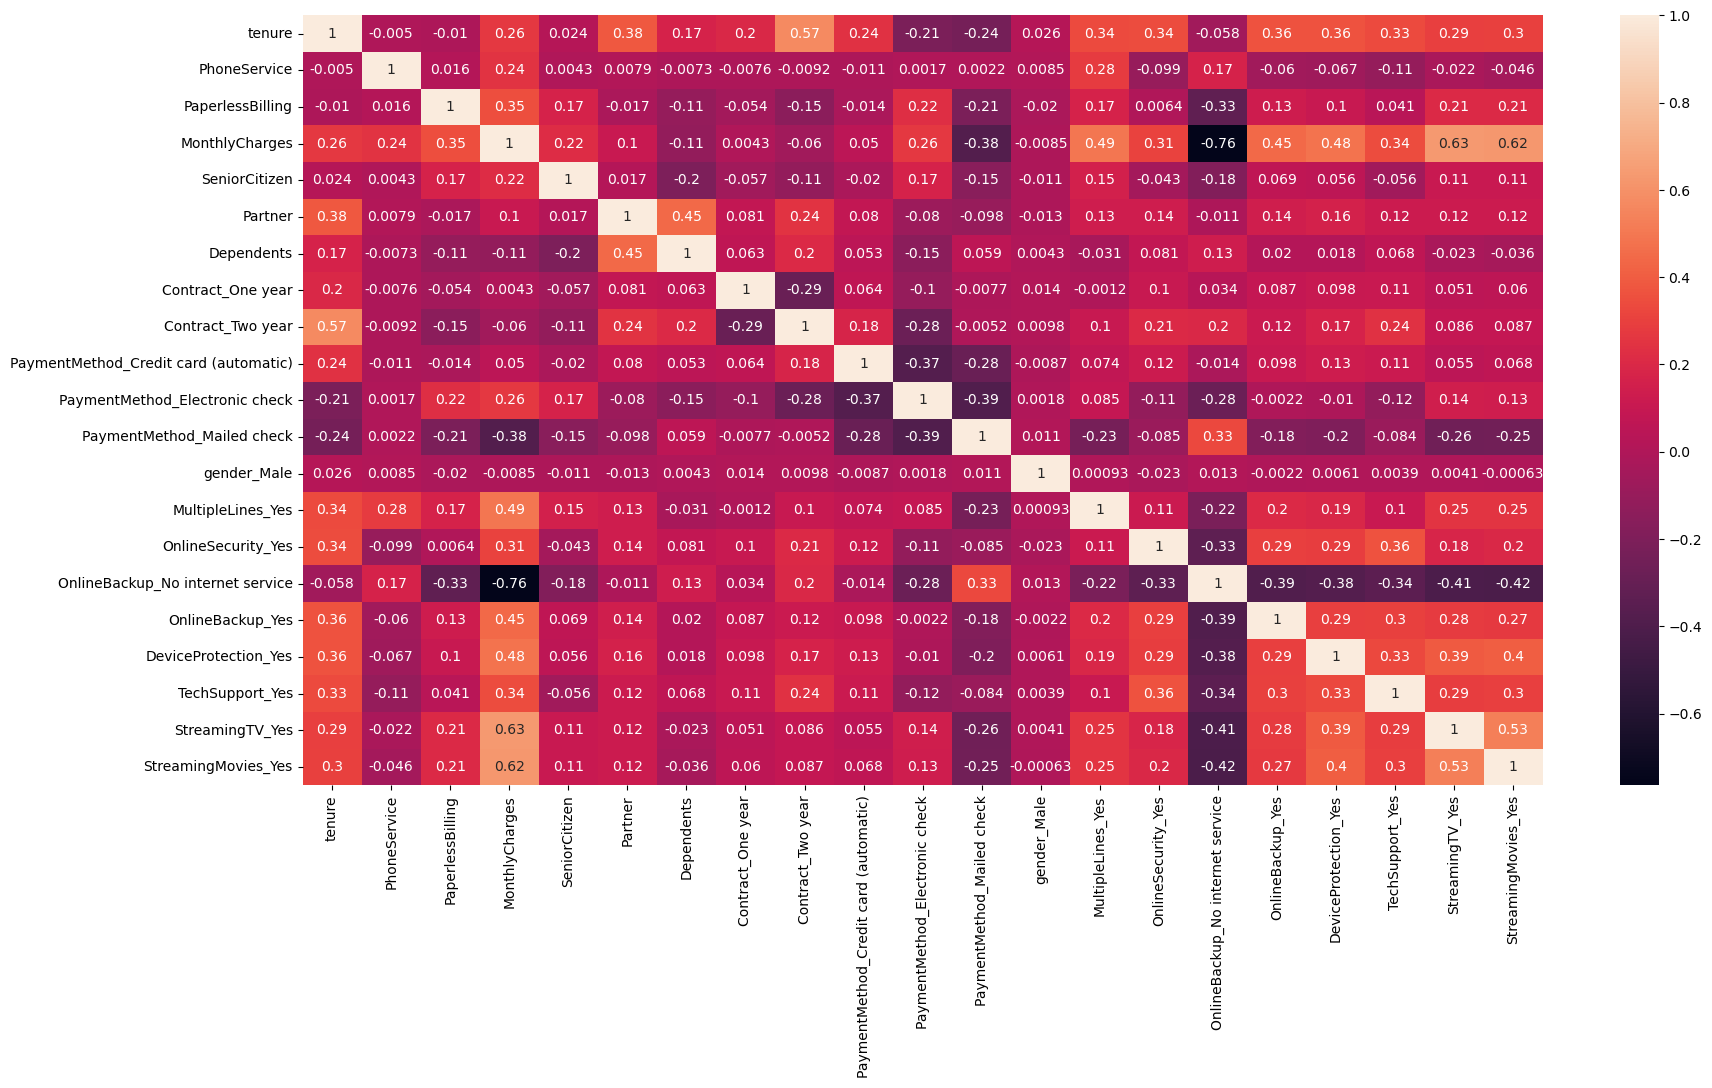

In [2036]:
# Obtaining the heatmap of the X_train datapoints
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [2037]:
# Fitting a constant to the X_train dataset to add an intercept to the data values
from statsmodels.tools import add_constant as add_constant
X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.032381,1,1,-0.333459,0,0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5789,1.0,-0.293230,1,0,-1.491062,0,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5008,1.0,-1.066555,1,0,-1.496045,0,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
880,1.0,-0.903749,1,1,1.508408,0,0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2784,1.0,-1.147957,1,1,1.109808,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [2038]:
# Fitting model to dataset
cols = X_train_constant.columns
model = smd.Logit(y_train, X_train_constant[cols])
res = model.fit()
res = res.summary()

Optimization terminated successfully.
         Current function value: 0.413365
         Iterations 8


In [2039]:
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4899
Method:                           MLE   Df Model:                           21
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.2838
Time:                        02:15:25   Log-Likelihood:                -2034.2
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0032      0.259     -0.012      0.990      -0.510       0.504
tenure                                   -0.8387      0.071    -11.893      0.000      -0.977      -0.700
PhoneService                             -1.0511      0.206     -5.098      0.000      -1.455      -0.647
PaperlessBilling                          0.3239      0.089      3.641      0.000       0.150       0.498
MonthlyCharges                            1.0003      0.130      7.697      0.000       0.746       1.255
SeniorCitizen                             0.4013      0.101      3.961      0.000       0.203       0.600
Partner                                   0.0091      0.092      0.099      0.921      -0.172       0.190
Dependents                               -0.1777      0.107     -1.657      0.098      -0.388       0.032
Contract_One year                        -0.7022      0.129     -5.431      0.000      -0.956      -0.449
Contract_Two year                        -1.3869      0.213     -6.525      0.000      -1.804      -0.970
PaymentMethod_Credit card (automatic)    -0.0834      0.136     -0.612      0.541      -0.350       0.184
PaymentMethod_Electronic check            0.2629      0.114      2.316      0.021       0.040       0.485
PaymentMethod_Mailed check               -0.0100      0.137     -0.073      0.942      -0.279       0.259
gender_Male                              -0.0519      0.078     -0.667      0.505      -0.204       0.101
MultipleLines_Yes                         0.1613      0.099      1.625      0.104      -0.033       0.356
OnlineSecurity_Yes                       -0.5175      0.101     -5.102      0.000      -0.716      -0.319
OnlineBackup_No internet service         -0.1385      0.224     -0.619      0.536      -0.578       0.300
OnlineBackup_Yes                         -0.3076      0.094     -3.283      0.001      -0.491      -0.124
DeviceProtection_Yes                     -0.1030      0.097     -1.060      0.289      -0.293       0.087
TechSupport_Yes                          -0.5099      0.102     -5.014      0.000      -0.709      -0.311
StreamingTV_Yes                          -0.0992      0.108     -0.921      0.357      -0.310       0.112
StreamingMovies_Yes                      -0.0958      0.108     -0.886      0.376      -0.308       0.116
=========================================================================================================
"""

### Dropping off Features of the X_train with P-value >0.05


In [2040]:
drop_cols = ['Partner', 'Dependents', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male', 'MultipleLines_Yes',
             'OnlineBackup_No internet service', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
             'PaymentMethod_Credit card (automatic)']

In [2041]:
 X_train_constant.drop(drop_cols, axis = 1, inplace = True)

In [2042]:
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
879,1.0,0.032381,1,1,-0.333459,0,0.0,0.0,0.0,1.0,0.0
5789,1.0,-0.293230,1,0,-1.491062,0,0.0,1.0,0.0,0.0,0.0
5008,1.0,-1.066555,1,0,-1.496045,0,0.0,1.0,0.0,0.0,0.0
880,1.0,-0.903749,1,1,1.508408,0,0.0,0.0,1.0,1.0,1.0
2784,1.0,-1.147957,1,1,1.109808,0,0.0,0.0,0.0,0.0,1.0


In [2043]:
# Recreating the Logit Model with updated features
model = smd.Logit(y_train, X_train_constant)
resNew = model.fit()

Optimization terminated successfully.
         Current function value: 0.415911
         Iterations 8


In [2044]:
resNew = resNew.summary()

In [2045]:
resNew

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4910
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.2794
Time:                        02:15:25   Log-Likelihood:                -2046.7
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0395      0.169     -0.233      0.815      -0.371       0.292
tenure                -0.8716      0.064    -13.585      0.000      -0.997      -0.746
PhoneService          -1.0537      0.147     -7.173      0.000      -1.342      -0.766
PaperlessBilling       0.3661      0.088      4.158      0.000       0.194       0.539
MonthlyCharges         1.0481      0.060     17.391      0.000       0.930       1.166
SeniorCitizen          0.4669      0.099      4.707      0.000       0.272       0.661
Contract_One year     -0.8054      0.127     -6.356      0.000      -1.054      -0.557
Contract_Two year     -1.5232      0.210     -7.268      0.000      -1.934      -1.112
OnlineSecurity_Yes    -0.5319      0.100     -5.323      0.000      -0.728      -0.336
OnlineBackup_Yes      -0.3082      0.092     -3.339      0.001      -0.489      -0.127
TechSupport_Yes       -0.5701      0.101     -5.651      0.000      -0.768      -0.372
======================================================================================
"""

In [2046]:
# Creating a new X_train_New for model fitting
Cols_models = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
               'OnlineSecurity_Yes', 'TechSupport_Yes']

In [2047]:
X_train_New = X_train_constant[Cols_models]
X_train_New['const'] = X_train_constant['const']

C:\Users\hp\AppData\Local\Temp\ipykernel_36400\2936581687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_New['const'] = X_train_constant['const']


In [2048]:
X_train_New.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes,const
879,0.032381,1,1,-0.333459,0,0.0,0.0,0.0,0.0,1.0
5789,-0.293230,1,0,-1.491062,0,0.0,1.0,0.0,0.0,1.0
5008,-1.066555,1,0,-1.496045,0,0.0,1.0,0.0,0.0,1.0
880,-0.903749,1,1,1.508408,0,0.0,0.0,1.0,1.0,1.0
2784,-1.147957,1,1,1.109808,0,0.0,0.0,0.0,1.0,1.0


In [2049]:
# Passing the variable to the logisticModel
Model = LogisticRegression()
Model.fit(X_train_New, y_train) # Fitting our dataset into the model to learn

LogisticRegression()

In [2050]:
# Making predictions using training data
y_train_pred = Model.predict(X_train_New)
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.80268238162975

<Axes: >

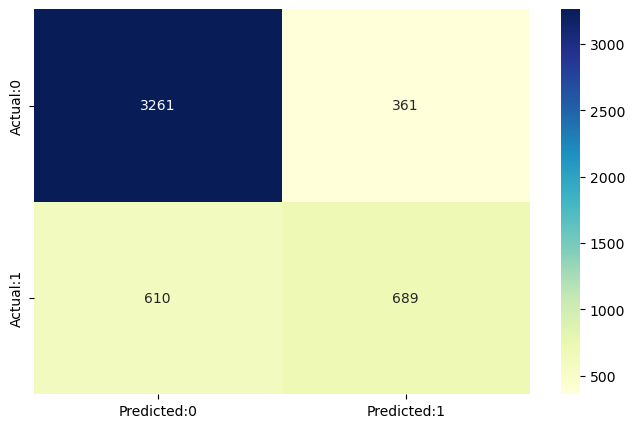

In [2051]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [2052]:
# Plotting our ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicted Probilities
lr_prob = Model.predict_proba(X_train_New)
print(lr_prob)

[[0.7669828  0.2330172 ]
 [0.97988383 0.02011617]
 [0.96014687 0.03985313]
 ...
 [0.95431291 0.04568709]
 [0.85258518 0.14741482]
 [0.9374015  0.0625985 ]]


Logistic: ROC AUC = 0.844


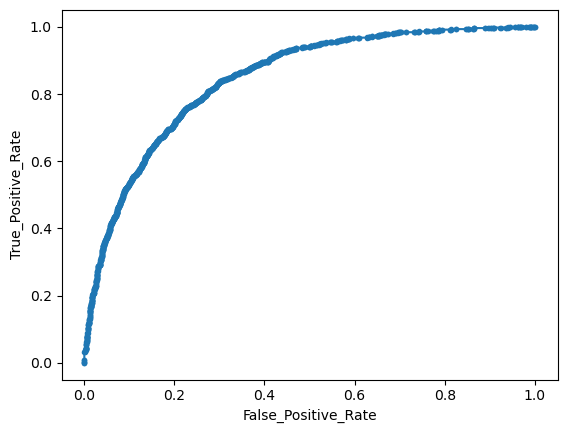

In [2053]:
# Calculating the roc_scores
lr_probs = lr_prob[:,1] # Selects only positives only
lr_auc = roc_auc_score(y_train, lr_probs)
# Printing summary of the scores
print("Logistic: ROC AUC = %.3f" %(lr_auc))

# Calculating the roc_curve of the dataset
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker = '.')
plt.xlabel("False_Positive_Rate")
plt.ylabel("True_Positive_Rate")
plt.show()

### Creating a dataframe with actual churn flag and predicted probailities

In [2054]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob': lr_probs})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(20)

,Churn,Churn_prob,CustID
0,0,0.233017,879
1,0,0.020116,5789
2,0,0.039853,5008
3,1,0.595555,880
4,1,0.680452,2784
5,0,0.010657,3873
6,0,0.348310,5386
7,1,0.460769,6622
8,1,0.396091,4464
9,0,0.206506,5278


### Creating a new column called predicted with probability of 1 for Churn_Prob >0.5 else 0


In [2055]:
y_train_pred_final['predicted'] = y_train_pred_final['Churn_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(20)

,Churn,Churn_prob,CustID,predicted
0,0,0.233017,879,0
1,0,0.020116,5789,0
2,0,0.039853,5008,0
3,1,0.595555,880,1
4,1,0.680452,2784,1
5,0,0.010657,3873,0
6,0,0.348310,5386,0
7,1,0.460769,6622,0
8,1,0.396091,4464,0
9,0,0.206506,5278,0


In [2056]:
y_train_pred_final.shape

(4921, 4)

In [2057]:
# Obtaining the confusion_matrix of the Churn data
confusion = sklearn.metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['predicted'])
print(confusion)

[[3261  361]
 [ 610  689]]


In [2058]:
# TN = 3261, FN = 361 TP = 610, FP = 689

In [2059]:
# Churning the accuracy of the predicted of the y_train_pred_final
print(sklearn.metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.80268238162975


### Finding the Optimal value of the cutoff points

In [2060]:
# We create columns of different cutoff values
numbers = [float(x)/10 for x in range(10)] # This is list of cut-off threshold values
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Churn_prob'].map(lambda x: 1 if x >i else 0)
y_train_pred_final.head(10)

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233017,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.020116,5789,0,1,0,0,0,0,0,0,0,0,0
2,0,0.039853,5008,0,1,0,0,0,0,0,0,0,0,0
3,1,0.595555,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.680452,2784,1,1,1,1,1,1,1,1,0,0,0
5,0,0.010657,3873,0,1,0,0,0,0,0,0,0,0,0
6,0,0.348310,5386,0,1,1,1,1,0,0,0,0,0,0
7,1,0.460769,6622,0,1,1,1,1,1,0,0,0,0,0
8,1,0.396091,4464,0,1,1,1,1,0,0,0,0,0,0
9,0,0.206506,5278,0,1,1,1,0,0,0,0,0,0,0


In [2061]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [2062]:
# We determine the accuracy, sensitivity and specificity for various probability cutoff points
cutoff = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])
nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    cm1 = sklearn.metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total_1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total_1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff.loc[i] = [ i,  accuracy, sensi, speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.263971  1.000000  0.000000
0.1   0.1  0.607803  0.944573  0.487024
0.2   0.2  0.711644  0.860662  0.658200
0.3   0.3  0.762447  0.767513  0.760629
0.4   0.4  0.790287  0.661278  0.836554
0.5   0.5  0.802682  0.530408  0.900331
0.6   0.6  0.797602  0.380293  0.947267
0.7   0.7  0.770169  0.173210  0.984263
0.8   0.8  0.743751  0.035412  0.997791
0.9   0.9  0.736029  0.000000  1.000000


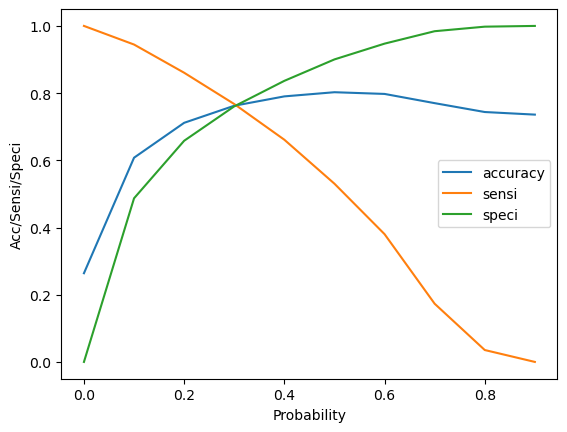

In [2063]:
# Making a plot of the cutoff points with prob, sensitvity, specificity and accuracy
cutoff.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.xlabel("Probability")
plt.ylabel("Acc/Sensi/Speci")
plt.show()

### The best optimum cutoff value should be 0.3 where there is intersection of all three variables

In [2064]:
# Making the final predicted labels on the prob of 0.3
y_train_pred_final['Final_predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x >0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.233017,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.020116,5789,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.039853,5008,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.595555,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.680452,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [2065]:
# Finding the accuracy of the threshold of o.3
print(sklearn.metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_predicted))

0.7624466571834992


In [2066]:
conf2 = sklearn.metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_predicted)
conf2

array([[2755,  867],
       [ 302,  997]], dtype=int64)

In [2067]:
# TN = 2755 FP = 867 FN = 302 TP = 997

## Making predictions on the test dataset

In [2068]:

Cols_models = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
               'OnlineSecurity_Yes', 'TechSupport_Yes']

X_test = X_test[Cols_models]

In [2069]:
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes
942,24,1,1,79.85,0,0.0,0.0,0.0,0.0
3729,62,1,1,20.05,0,0.0,1.0,0.0,0.0
1761,58,1,1,24.45,0,0.0,1.0,0.0,0.0
2283,1,1,1,71.55,0,0.0,0.0,0.0,0.0
1872,41,1,0,19.70,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1289,63,1,0,68.80,0,1.0,0.0,1.0,1.0
6347,15,1,1,68.60,0,0.0,0.0,0.0,0.0
6403,72,1,1,116.60,0,0.0,1.0,1.0,1.0
3597,25,1,1,95.70,0,0.0,0.0,0.0,1.0


In [2070]:
Scaler = StandardScaler()
X_test[['tenure', 'MonthlyCharges']] = Scaler.fit_transform(X_test[['tenure', 'MonthlyCharges']])

In [2071]:
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes
942,-0.364216,1,1,0.493442,0,0.0,0.0,0.0,0.0
3729,1.188632,1,1,-1.498148,0,0.0,1.0,0.0,0.0
1761,1.025174,1,1,-1.351610,0,0.0,1.0,0.0,0.0
2283,-1.304098,1,1,0.217017,0,0.0,0.0,0.0,0.0
1872,0.330479,1,0,-1.509805,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1289,1.229496,1,0,0.125430,0,1.0,0.0,1.0,1.0
6347,-0.731996,1,1,0.118770,0,0.0,0.0,0.0,0.0
6403,1.597276,1,1,1.717370,0,0.0,1.0,1.0,1.0
3597,-0.323352,1,1,1.021313,0,0.0,0.0,0.0,1.0


In [2072]:
X_test_constant = add_constant(X_test)
X_test_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes
942,1.0,-0.364216,1,1,0.493442,0,0.0,0.0,0.0,0.0
3729,1.0,1.188632,1,1,-1.498148,0,0.0,1.0,0.0,0.0
1761,1.0,1.025174,1,1,-1.351610,0,0.0,1.0,0.0,0.0
2283,1.0,-1.304098,1,1,0.217017,0,0.0,0.0,0.0,0.0
1872,1.0,0.330479,1,0,-1.509805,0,0.0,1.0,0.0,0.0


In [2073]:
X_test_New = X_test_constant[Cols_models]
X_test_New['const'] = X_test_constant['const']

In [2074]:
X_test_New

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes,const
942,-0.364216,1,1,0.493442,0,0.0,0.0,0.0,0.0,1.0
3729,1.188632,1,1,-1.498148,0,0.0,1.0,0.0,0.0,1.0
1761,1.025174,1,1,-1.351610,0,0.0,1.0,0.0,0.0,1.0
2283,-1.304098,1,1,0.217017,0,0.0,0.0,0.0,0.0,1.0
1872,0.330479,1,0,-1.509805,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1289,1.229496,1,0,0.125430,0,1.0,0.0,1.0,1.0,1.0
6347,-0.731996,1,1,0.118770,0,0.0,0.0,0.0,0.0,1.0
6403,1.597276,1,1,1.717370,0,0.0,1.0,1.0,1.0,1.0
3597,-0.323352,1,1,1.021313,0,0.0,0.0,0.0,1.0,1.0


In [2075]:
y_test_pred = Model.predict(X_test_New)

In [2076]:
# Converting y_test_predict into an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2077]:
y_pred_1.head()
y_pred_1 = y_pred_1.rename(columns = {0 :'Model'})

In [2078]:
y_pred_1

,Model
0,0
1,0
2,0
3,1
4,0
...,...
2105,0
2106,0
2107,0
2108,0


In [2079]:
y_test_df = pd.DataFrame(y_test)

In [2080]:
# Adding CustID to the y_test_df
y_test_df['CustID'] = y_test_df.index

In [2081]:
# Appending index sideways of the dataframes
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [2082]:
y_pred_1.head()

,Model
0,0
1,0
2,0
3,1
4,0


In [2083]:
y_test_df.head()

,Churn,CustID
0,0,942
1,0,3729
2,0,1761
3,1,2283
4,0,1872


In [2084]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [2085]:
y_pred_final

,Churn,CustID,Model
0,0,942,0
1,0,3729,0
2,0,1761,0
3,1,2283,1
4,0,1872,0
...,...,...,...
2105,0,1289,0
2106,0,6347,0
2107,0,6403,0
2108,0,3597,0


In [2086]:
# Creating a new column for Churn_probabilities
lr_prob_test = Model.predict_proba(X_test_New)
lr_prob_test

array([[0.50062079, 0.49937921],
       [0.99248701, 0.00751299],
       [0.989924  , 0.010076  ],
       ...,
       [0.95958247, 0.04041753],
       [0.52210596, 0.47789404],
       [0.99629888, 0.00370112]])

In [2087]:
lr_prob_test = lr_prob_test[:, 1]

In [2088]:
lr_prob_test

array([0.49937921, 0.00751299, 0.010076  , ..., 0.04041753, 0.47789404,
       0.00370112])

In [2089]:
y_pred_final['Churn_prob'] = lr_prob_test # This creates 

In [2090]:
y_pred_final

,Churn,CustID,Model,Churn_prob
0,0,942,0,0.499379
1,0,3729,0,0.007513
2,0,1761,0,0.010076
3,1,2283,1,0.641836
4,0,1872,0,0.011246
...,...,...,...,...
2105,0,1289,0,0.016097
2106,0,6347,0,0.490195
2107,0,6403,0,0.040418
2108,0,3597,0,0.477894


In [2092]:
y_pred_final

,Churn,CustID,Model,Churn_prob,final_Predicted
0,0,942,0,0.499379,1
1,0,3729,0,0.007513,0
2,0,1761,0,0.010076,0
3,1,2283,1,0.641836,1
4,0,1872,0,0.011246,0
...,...,...,...,...,...
2105,0,1289,0,0.016097,0
2106,0,6347,0,0.490195,1
2107,0,6403,0,0.040418,0
2108,0,3597,0,0.477894,1


In [2101]:
# Checking for the accuracy score of the test
print(sklearn.metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Model))

0.7995260663507109


In [2102]:
confu2_test = sklearn.metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Model)
confu2_test

array([[1383,  157],
       [ 266,  304]], dtype=int64)